In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

import string
from string import digits
import re

In [2]:
df = pd.read_table('kor.txt', names=['eng','kor'])

C:\Users\user\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [18]:
df.head()

,eng,kor
0,Who?,누구?
1,Hello!,안녕!
2,No way!,절대 아니야.
3,No way!,그럴리가!
4,Goodbye!,안녕!


In [19]:
df.tail()

,eng,kor
904,"Tom was standing outside the window, listening...",톰은 메리와 존이 말하는 것을 들으며 창문 밖에 서 있었다.
905,Tom occasionally prods me to work out with him...,톰은 때때로 같이 운동하자고 졸라댔지만 나는 정말 운동에 관심이 없다.
906,I think I can speak French well enough to say ...,나는 내가 말하고 싶은 것은 거의 다 말할 수 있을 정도로 불어를 잘 한다고 생각한다.
907,It's not always possible to eat well when you'...,"당신이 세계를 여행하는 동안, 항상 잘먹는 것이 가능하지는 않습니다."
908,Make a good translation of the sentence that y...,당신이 번역할 문장에 충실하게 번역하십시오. 다른 언어로 번역된 문장의 영향을 받지...


In [20]:
df.shape

(909, 2)

In [29]:
#df 복사 후 영어 소문자화
lines = df.copy()
lines.eng = lines.eng.apply(lambda x : x.lower())


In [30]:
lines.eng=lines.eng.apply(lambda x: re.sub("'", '', x)).apply(lambda x: re.sub(",", '', x))
lines.kor=lines.kor.apply(lambda x: re.sub("'", '', x)).apply(lambda x: re.sub(",", '', x))

exclude = set(string.punctuation) # '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
lines.eng=lines.eng.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
lines.kor=lines.kor.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

# 숫자를 지운다
remove_digits = str.maketrans('', '', digits)
lines.eng=lines.eng.apply(lambda x: x.translate(remove_digits))
lines.kor=lines.kor.apply(lambda x: x.translate(remove_digits))

In [31]:
lines.head()

,eng,kor
0,who,누구
1,hello,안녕
2,no way,절대 아니야
3,no way,그럴리가
4,goodbye,안녕


In [32]:
lines.tail()

,eng,kor
904,tom was standing outside the window listening ...,톰은 메리와 존이 말하는 것을 들으며 창문 밖에 서 있었다
905,tom occasionally prods me to work out with him...,톰은 때때로 같이 운동하자고 졸라댔지만 나는 정말 운동에 관심이 없다
906,i think i can speak french well enough to say ...,나는 내가 말하고 싶은 것은 거의 다 말할 수 있을 정도로 불어를 잘 한다고 생각한다
907,its not always possible to eat well when youre...,당신이 세계를 여행하는 동안 항상 잘먹는 것이 가능하지는 않습니다
908,make a good translation of the sentence that y...,당신이 번역할 문장에 충실하게 번역하십시오 다른 언어로 번역된 문장의 영향을 받지 ...


### 한글 문장에 태그달기

- start 와 end




In [33]:
lines.kor = lines.kor.apply(lambda x : 'START_ ' + x + ' _END')

In [34]:
lines.head()

,eng,kor
0,who,START_ 누구 _END
1,hello,START_ 안녕 _END
2,no way,START_ 절대 아니야 _END
3,no way,START_ 그럴리가 _END
4,goodbye,START_ 안녕 _END


In [35]:
eng_words = set()
for eng in lines.eng:
    for word in eng.split():
        eng_words.add(word)
        
kor_words = set()
for kor in lines.kor:
    for word in kor.split():
        kor_words.add(word)

In [36]:
eng_words = sorted(list(eng_words))
kor_words = sorted(list(kor_words))

len(eng_words), len(kor_words)

(1158, 2038)

In [37]:
display(eng_words[:10], kor_words[:10])

['a',
 'about',
 'above',
 'abroad',
 'absolutely',
 'accept',
 'accurate',
 'actions',
 'active',
 'add']

['A와',
 'Birthday',
 'B의',
 'Happy',
 'Mary가',
 'START_',
 'Tom과',
 'Tom은',
 'Tom이',
 '_END']

## 단어 사전 만들기

In [79]:
eng_w2i = { word : i for i, word in enumerate(eng_words)}
kor_w2i = { word : i for i, word in enumerate(kor_words)}

eng_i2w = { i : word for word, i in eng_w2i.items()}


In [80]:
len(eng_i2w), len(kor_i2w)

(1158, 2038)

In [81]:
display(eng_i2w, kor_i2w)

{0: 'a',
 1: 'about',
 2: 'above',
 3: 'abroad',
 4: 'absolutely',
 5: 'accept',
 6: 'accurate',
 7: 'actions',
 8: 'active',
 9: 'add',
 10: 'advice',
 11: 'africa',
 12: 'after',
 13: 'afternoon',
 14: 'again',
 15: 'against',
 16: 'ages',
 17: 'agree',
 18: 'ahead',
 19: 'airport',
 20: 'all',
 21: 'allowed',
 22: 'almost',
 23: 'alone',
 24: 'along',
 25: 'already',
 26: 'also',
 27: 'always',
 28: 'am',
 29: 'amateurs',
 30: 'amazing',
 31: 'american',
 32: 'an',
 33: 'and',
 34: 'anger',
 35: 'angles',
 36: 'animals',
 37: 'answer',
 38: 'any',
 39: 'anymore',
 40: 'anyone',
 41: 'anything',
 42: 'apartment',
 43: 'apologize',
 44: 'apology',
 45: 'apples',
 46: 'appreciate',
 47: 'arctic',
 48: 'are',
 49: 'arent',
 50: 'arguing',
 51: 'around',
 52: 'aroused',
 53: 'arrives',
 54: 'art',
 55: 'as',
 56: 'ashamed',
 57: 'ask',
 58: 'asked',
 59: 'at',
 60: 'ate',
 61: 'attempted',
 62: 'attended',
 63: 'attention',
 64: 'attracted',
 65: 'attribute',
 66: 'attributes',
 67: 'aus

{0: 'A와',
 1: 'Birthday',
 2: 'B의',
 3: 'Happy',
 4: 'Mary가',
 5: 'START_',
 6: 'Tom과',
 7: 'Tom은',
 8: 'Tom이',
 9: '_END',
 10: '가',
 11: '가게',
 12: '가격은',
 13: '가격을',
 14: '가고',
 15: '가곤',
 16: '가기',
 17: '가기로',
 18: '가까운',
 19: '가끔',
 20: '가난한',
 21: '가난했었다',
 22: '가는',
 23: '가능하지',
 24: '가능하지는',
 25: '가도',
 26: '가려면',
 27: '가르쳐',
 28: '가르쳤는지',
 29: '가만히',
 30: '가방',
 31: '가방에',
 32: '가방이',
 33: '가수가',
 34: '가수는',
 35: '가위',
 36: '가을보다',
 37: '가을이',
 38: '가자',
 39: '가장',
 40: '가져',
 41: '가져도',
 42: '가졌다',
 43: '가지고',
 44: '가지를',
 45: '가지세요',
 46: '가질',
 47: '가치가',
 48: '각이',
 49: '간다',
 50: '갈',
 51: '갈색',
 52: '감사함을',
 53: '감옥에서',
 54: '감으세요',
 55: '감자와',
 56: '감정을',
 57: '값을',
 58: '갔다',
 59: '갔어',
 60: '갔었습니까',
 61: '갔으면',
 62: '강아지가',
 63: '같네요',
 64: '같아',
 65: '같아서',
 66: '같은',
 67: '같이',
 68: '같지',
 69: '같지만',
 70: '개가',
 71: '개다',
 72: '개를',
 73: '개발을',
 74: '개와',
 75: '개월이다',
 76: '개의치',
 77: '걔',
 78: '걔네',
 79: '걔는',
 80: '걔들이',
 81: '거',
 82: '거기에',
 83: '거니',
 84: '거라는'

## 최대 문장 길이

In [42]:
eng_sen_max = max([len(sen.split()) for sen in lines.eng])
kor_sen_max = max([len(sen.split()) for sen in lines.kor])

eng_sen_max, kor_sen_max

(19, 17)

## 입/출력 데이터 생성 (어레이)

In [43]:
encoder_input_data = np.zeros([len(lines), eng_sen_max])
decoder_input_data = np.zeros([len(lines), kor_sen_max])
decoder_output_data = np.zeros([len(lines), kor_sen_max, len(kor_words) ])

In [46]:
for line, (eng, kor) in enumerate(zip(lines.eng, lines.kor)):
    for t, word in enumerate(eng.split()):
        encoder_input_data[line, t] = eng_w2i[word]
        
    for t, word in enumerate(kor.split()):
        decoder_input_data[line, t] = kor_w2i[word]
        if t>0:
            decoder_output_data[line, t-1, kor_w2i[word]] = 1 

# 인코더 생성


In [65]:
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Dense

In [66]:
embedding_size = 50

enc_inputs = Input((eng_sen_max,))
enc_embed = Embedding(len(eng_words),embedding_size)(enc_inputs)

enc_lstm = LSTM(50, return_state = True)
enc_output, state_h, state_c = enc_lstm(enc_embed)

enc_states = [state_h, state_c]

## 디코더 생성

In [67]:
dec_inputs = Input((kor_sen_max,))
dec_embed = Embedding(len(kor_words), embedding_size)(dec_inputs)

dec_lstm = LSTM(50, return_sequences =True)
dec_outputs = dec_lstm(dec_embed, initial_state = enc_states)

dec_outputs = Dense(len(kor_words), activation = 'softmax')(dec_outputs)

In [68]:
model = Model([enc_inputs, dec_inputs], dec_outputs)

In [69]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [70]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 19)           0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 17)           0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 19, 50)       57900       input_3[0][0]                    
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 17, 50)       101900      input_4[0][0]                    
__________________________________________________________________________________________________
lstm_3 (LS

## 학습시키기

In [71]:
h = model.fit([encoder_input_data, decoder_input_data], decoder_output_data,
             batch_size = 32, epochs = 40, validation_split =0.1)

Train on 818 samples, validate on 91 samples
Epoch 1/40
818/818 [==============================] - 3s 3ms/step - loss: 2.1253 - acc: 0.0536 - val_loss: 3.6005 - val_acc: 0.0588
Epoch 2/40
818/818 [==============================] - 1s 2ms/step - loss: 1.9300 - acc: 0.0588 - val_loss: 3.5215 - val_acc: 0.0588
Epoch 3/40
818/818 [==============================] - 1s 2ms/step - loss: 1.6919 - acc: 0.0593 - val_loss: 3.6666 - val_acc: 0.0672
Epoch 4/40
818/818 [==============================] - 2s 2ms/step - loss: 1.6323 - acc: 0.0647 - val_loss: 3.7759 - val_acc: 0.0672
Epoch 5/40
818/818 [==============================] - 2s 2ms/step - loss: 1.6157 - acc: 0.0647 - val_loss: 3.8120 - val_acc: 0.0672
Epoch 6/40
818/818 [==============================] - 1s 2ms/step - loss: 1.6034 - acc: 0.0647 - val_loss: 3.8533 - val_acc: 0.0672
Epoch 7/40
818/818 [==============================] - 2s 2ms/step - loss: 1.5907 - acc: 0.0644 - val_loss: 3.8900 - val_acc: 0.0672
Epoch 8/40
818/818 [===========

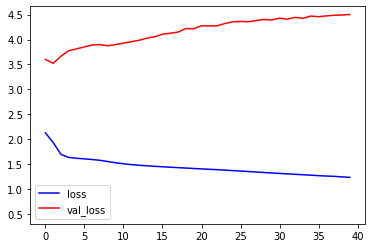

In [72]:
plt.plot(h.history['loss'], 'b-')
plt.plot(h.history['val_loss'], 'r-')
plt.ylim(0.3)
plt.legend(['loss','val_loss'])

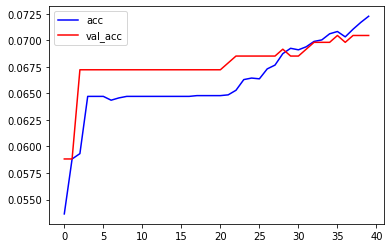

In [74]:
plt.plot(h.history['acc'], 'b-')
plt.plot(h.history['val_acc'], 'r-')

plt.legend(['acc','val_acc'])

## 번역하기

In [84]:
s = 'I love you'
I = s.lower().split()
I = [word for word in I if word in eng_words][:eng_sen_max]

###영어입력

eng_text = np.zeros([1, eng_sen_max])
for t, word in enumerate(I):
    eng_text[0,t] =eng_w2i[word]
    
### 한글 입력

kor_text = np.zeros([1, kor_sen_max])
kor_text[0,0] = kor_w2i['START_']
result = []

for i in range(kor_sen_max):
    pred_y = model.predict([eng_text,kor_text])[0,i]
    
    idx = np.argmax(pred_y)
    word = kor_i2w[idx]
    result.append(word)
    
    if word =='_END' or i ==(kor_sen_max-1) : break
        
    kor_text[0,i+1] = idx
    
display(s,I, ' '.join(result))

'I love you'

['i', 'love', 'you']

'나는 내 자신이 _END'